# Reconocimiento de Patrones en Imagenes - Clase 17

## LDA 

Linear Discriminant Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#data original
D=[ [4,3,1],
    [5,3,1],
    [5,4,1],
    [5,5,1],
    [6,5,1],
    [2,4,2],
    [3,4,2],
    [3,5,2],
    [4,6,2]]

data = np.array(D)

# Contar cantidad de cada clase
classes, counts = np.unique(data[:, 2], return_counts=True)

print("Cantidad de ejemplos por clase:")
for cls, count in zip(classes, counts):
    print(f"Clase {cls}: {count} ejemplos")

# Probabilidad de cada clase
probabilities = counts / len(data)
print("\nProbabilidades de cada clase:")
for cls, prob in zip(classes, probabilities):
    print(f"Clase {cls}: {prob:.2f}")


# unique = np.unique(data[:, 2], return_counts=True)
# print(unique)

Cantidad de ejemplos por clase:
Clase 1: 5 ejemplos
Clase 2: 4 ejemplos

Probabilidades de cada clase:
Clase 1: 0.56
Clase 2: 0.44


In [ ]:
# Promedio por columna
mean_total = np.mean(data[:, :2], axis=0)
print(f"Media total de los datos", mean_total)
print()

# Promedio por clase
mean_class = {}
for cls in classes:
    mean_class[cls] = np.mean(data[data[:, 2] == cls][:, :2], axis=0)
    print(f"Media de la clase {cls}: {mean_class[cls]}")
print()

# Matriz de covarianza por clase
cov_class = {}
for cls in classes:
    cov_class[cls] = np.cov(data[data[:, 2] == cls][:, :2], rowvar=False)
    print(f"Matriz de covarianza de la clase {cls}:\n{cov_class[cls]}\n")

Media total de los datos [4.11111111 4.33333333]

Media de la clase 1: [5. 4.]
Media de la clase 2: [3.   4.75]

Matriz de covarianza de la clase 1:
[[0.5 0.5]
 [0.5 1. ]]

Matriz de covarianza de la clase 2:
[[0.66666667 0.66666667]
 [0.66666667 0.91666667]]



In [40]:
# la matriz de covarianza entre clases ponderando la probabilidad de cada clase
cov_classes = np.zeros_like(cov_class[1])

for cls in classes:
    cov_classes += probabilities[cls - 1] * cov_class[cls]

print("Matriz de covarianza combinada entre clases:\n", cov_classes)
print()

# Matriz inversa
cov_inv = np.linalg.inv(cov_classes)
print("Matriz inversa combinada:\n", cov_inv)


Matriz de covarianza combinada entre clases:
 [[0.57407407 0.57407407]
 [0.57407407 0.96296296]]

Matriz inversa combinada:
 [[ 4.31336406 -2.57142857]
 [-2.57142857  2.57142857]]


In [41]:
# Desicion LDA

def lda_decision(x):
    scores = {}
    for cls in classes:
        mean_vec = mean_class[cls]
        prior = probabilities[cls - 1]
        score = (x @ cov_inv @ mean_vec) - (0.5 * mean_vec.T @ cov_inv @ mean_vec) + np.log(prior)
        scores[cls] = score
    return max(scores, key=scores.get)

# Probar la función de decisión
test_points = np.array([[5, 4], [3, 5], [6, 4], [2, 3]])
for point in test_points:
    assigned_class = lda_decision(point)
    print(f"Punto {point} asignado a la clase {assigned_class}")

Punto [5 4] asignado a la clase 1
Punto [3 5] asignado a la clase 2
Punto [6 4] asignado a la clase 1
Punto [2 3] asignado a la clase 2


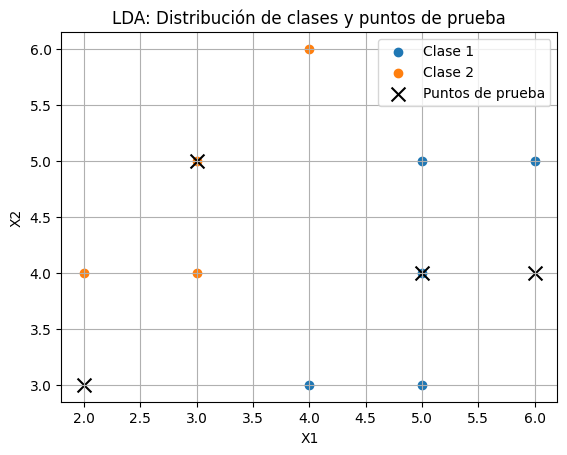

In [42]:
plt.figure()
for cls in classes:
    plt.scatter(data[data[:, 2] == cls][:, 0], data[data[:, 2] == cls][:, 1], label=f'Clase {cls}')
plt.scatter(test_points[:, 0], test_points[:, 1], color='black', marker='x', s=100, label='Puntos de prueba')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA: Distribución de clases y puntos de prueba')
plt.legend()
plt.grid()
plt.show()